- It is a supervised Learning Algorithm which is based on Bayes Theorem and used for solving classification problem.
- It is a probablistic classifier which means that it predicts on the basis of probability of an object.
- Examples- Spam Filteration,sentimental analysis

- Why Naive?
  - it is called so because it assumes that the occurence of a certain feature is independent of the occurences of other features.
- Why Bayes?
  - it is called so because it depends on the principle of Bayes Theorem

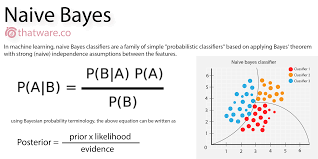

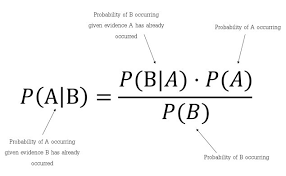

# Three Types of NB
- Gaussian where feature follows a normal distribution
- Multinomial used for document classification where frequency of words for the predictors
- Bernoulli same as multinomial but predictors variable are independent boolean variable

In [1]:
import pandas as pd
df = pd.read_csv('titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [3]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis = 'columns',inplace = True)

In [5]:
df

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500
...,...,...,...,...,...
886,0,2,male,27.0,13.0000
887,1,1,female,19.0,30.0000
888,0,3,female,NaN,23.4500
889,1,1,male,26.0,30.0000


In [6]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
Fare          0
dtype: int64

In [7]:
df['Age'] = df['Age'].fillna(value=df['Age'].median())

In [9]:
from sklearn.preprocessing import LabelEncoder
le_Sex= LabelEncoder()
df["Gender"] = le_Sex.fit_transform(df['Sex'])

In [10]:
df

,Survived,Pclass,Sex,Age,Fare,Gender
0,0,3,male,22.0,7.2500,1
1,1,1,female,38.0,71.2833,0
2,1,3,female,26.0,7.9250,0
3,1,1,female,35.0,53.1000,0
4,0,3,male,35.0,8.0500,1
...,...,...,...,...,...,...
886,0,2,male,27.0,13.0000,1
887,1,1,female,19.0,30.0000,0
888,0,3,female,28.0,23.4500,0
889,1,1,male,26.0,30.0000,1


In [11]:
df.drop('Sex',axis = 'columns',inplace = True)
df

,Survived,Pclass,Age,Fare,Gender
0,0,3,22.0,7.2500,1
1,1,1,38.0,71.2833,0
2,1,3,26.0,7.9250,0
3,1,1,35.0,53.1000,0
4,0,3,35.0,8.0500,1
...,...,...,...,...,...
886,0,2,27.0,13.0000,1
887,1,1,19.0,30.0000,0
888,0,3,28.0,23.4500,0
889,1,1,26.0,30.0000,1


In [12]:
X = df.drop(['Survived'], axis='columns')
y = df['Survived']

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2)

In [14]:
len(X_train)

712

In [15]:
len(y_train)

712

In [16]:
len(X_test)

179

In [17]:
len(y_test)

179

In [18]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.7597765363128491

In [19]:
#using cross validation
from sklearn.model_selection import cross_val_score

In [26]:
cv = cross_val_score(model,X_train,y_train,cv = 5)
cv

array([0.82517483, 0.77622378, 0.68309859, 0.80985915, 0.8028169 ])

In [27]:
import numpy as np
np.average(cv)

0.7794346498571851